In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [116]:
path = 'data\cars_train.csv'
df = pd.read_csv(path)

In [117]:
#informações relevantes apenas para a venda ID, Numero de fotos
#elegivel_revisão, veiculo_alienado são colunas com apenas valores False, logo ela pode ser descartada por não conter infmação relevante
#não estamos interessados em cidade_vendedor

df = df.drop(columns=['id','num_fotos','elegivel_revisao','veiculo_alienado','cidade_vendedor'])
df

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,Sedã,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,74733
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,Sedã,N,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,81965
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,Sedã,N,...,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,162825
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,...,True,True,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,123681
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,403015
29580,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,Picape,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,88978
29581,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019,44742,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,218808
29582,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022,35376,Automática,4,Sedã,N,...,True,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,68496


In [118]:
n_carros_modelo = df["modelo"].value_counts()
n_carros_modelo

COMPASS         1480
2008            1431
Q3               914
TORO             902
COROLLA          867
                ... 
X-TRAIL            1
QUATTROPORTE       1
ES                 1
S4                 1
SLK 230            1
Name: modelo, Length: 457, dtype: int64

Apenas algumas configurações para melhor visualizar as informações

In [119]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.f' % x)

agrupando os dados por modelo de carro

In [120]:
df_modelos = df.groupby('modelo').mean().sort_values(by=['preco'])
df_modelos

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,preco
modelo,,,,,,,
PASEO,1994,2011,182751,2,0,0,18528
SYMBOL,2006,2011,89440,4,0,0,18764
ESCORT,1993,2011,141375,2,0,0,20162
ES,1997,2013,168922,4,0,0,21815
STILO,1991,2011,111190,4,0,0,23277
...,...,...,...,...,...,...,...
Q8,2020,2020,18286,4,0,0,413597
RS6,2017,2017,37308,4,0,0,413860
718,2017,2018,20638,3,0,0,434673


Distribuição de preço médio dos modelos (preço médio do modelo x numero de modelos)

Text(0.5, 0, 'Preco médio do modelos')

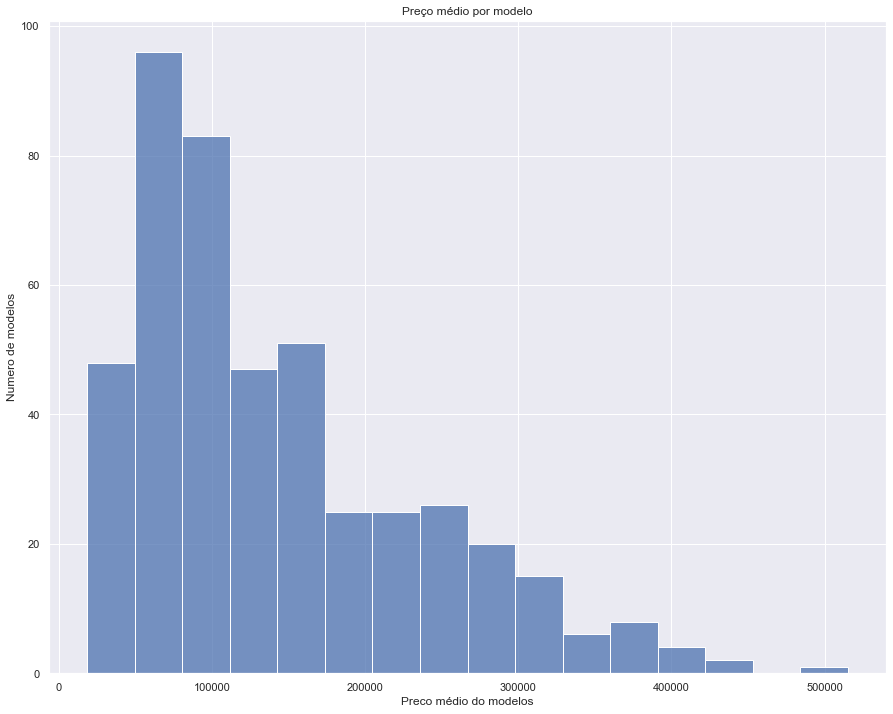

In [121]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_modelos, x = 'preco')
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Preco médio do modelos")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

In [122]:
n_carros_marca = df["marca"].value_counts()
n_carros_marca

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

In [123]:
df_marca= df.groupby('marca').mean().sort_values(by=['preco'])
df_marca

,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,preco
marca,,,,,,,
EFFA,2003,2013,187811,2,0,0,40163
BRM,1995,2012,59557,4,0,0,47763
CHRYSLER,2005,2013,105508,4,0,0,62570
ALFA ROMEO,2000,2013,91757,4,0,0,68173
CITROËN,2015,2016,80193,4,0,0,73494
DODGE,2008,2014,114706,4,0,0,74371
RENAULT,2017,2018,63295,4,0,0,82649
LIFAN,2017,2017,57131,4,0,0,84162
HYUNDAI,2016,2018,61681,4,0,0,84420


Text(0.5, 0, 'Preco médio do marca')

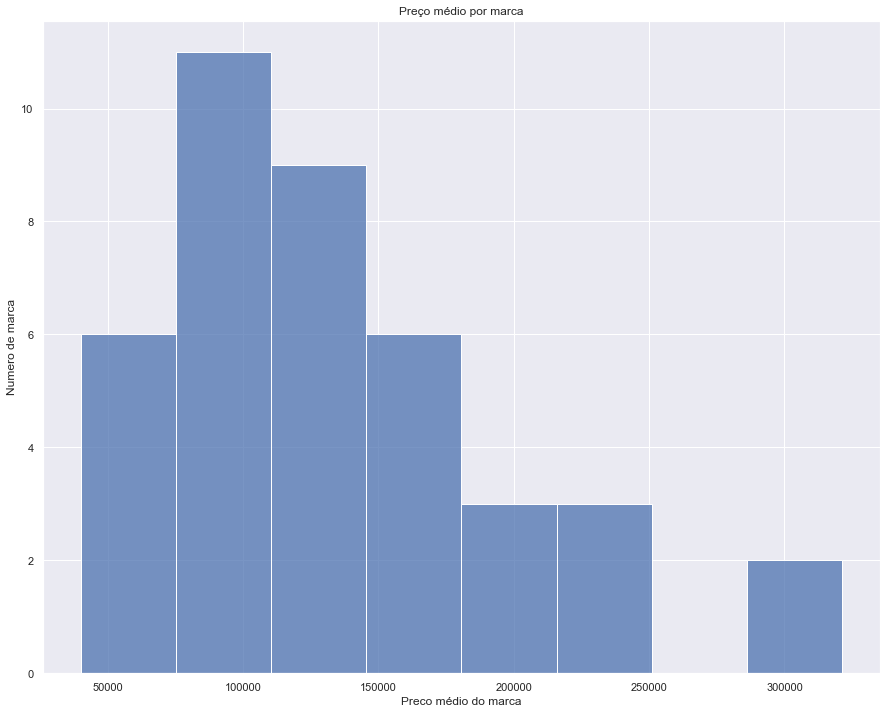

In [124]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_marca, x = 'preco')
graph.set_title("Preço médio por marca")
graph.set_ylabel("Numero de marca")
graph.set_xlabel("Preco médio do marca")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

Segundo a Focus2Move que mantém dados de vendas de carro ao redor do mundo, as 5 marcas mais vendidas em Junho de 2023 foram Fiat, Chevrolet, Wolksvagen, Toyota e Hyunday (https://www.focus2move.com/brazil-vehicles-market/). Portanto para definir qual melhor estado para se vender uma marca popular vamos filtrar os dados por essas 5 marcas.

In [125]:
top_brands = ['VOLKSWAGEN','CHEVROLET','FIAT','TOYOTA','HYUNDAI']

df_marcas_populares = df.loc[df['marca'].isin(top_brands)]
df_marcas_populares

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,...,True,True,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,123681
5,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2017,2018,85314,Manual,4,Sedã,N,...,True,True,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,51326
8,VOLKSWAGEN,UP,1.0 TSI HIGH UP 12V FLEX 4P MANUAL,2017,2018,39987,Manual,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,75089
9,TOYOTA,HILUX SW4,2.7 SRV 7 LUGARES 4X2 16V FLEX 4P AUTOMÁTICO,2019,2020,43328,Automática,4,Utilitário esportivo,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,218635
10,TOYOTA,FIELDER,1.8 SE-G 16V FLEX 4P AUTOMÁTICO,1996,2012,210099,Automática,4,Perua/SW,N,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,44634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,CHEVROLET,SPIN,1.8 PREMIER 8V FLEX 4P AUTOMÁTICO,2020,2021,39498,Automática,4,Sedã,N,...,True,True,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,77504
29578,HYUNDAI,HB20,1.0 12V FLEX EVOLUTION MANUAL,2021,2022,28784,Manual,4,Hatchback,N,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,72798
29579,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,403015
29580,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,Picape,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,88978


In [126]:
marcas_populares_por_estado = df_marcas_populares.groupby('estado_vendedor')['preco'].agg(['mean', 'std', 'min', 'max'])
marcas_populares_por_estado = marcas_populares_por_estado.reset_index()
marcas_populares_por_estado.sort_values('mean',ascending=False)

,estado_vendedor,mean,std,min,max
22,Sergipe (SE),188331,108336,44862,400378
15,Piauí (PI),181713,55961,121852,240243
8,Mato Grosso (MT),140977,63789,59041,269005
7,Maranhão (MA),131409,6700,124371,137709
6,Goiás (GO),129709,65722,30260,403015
19,Rondônia (RO),126252,2936,124197,129614
11,Paraná (PR),123855,70314,19906,550147
1,Alagoas (AL),123220,65477,39477,345007
17,Rio Grande do Sul (RS),121517,68423,18394,404368
10,Minas Gerais (MG),117271,67732,14465,457118


Text(0.5, 0, 'Preco médio do marca')

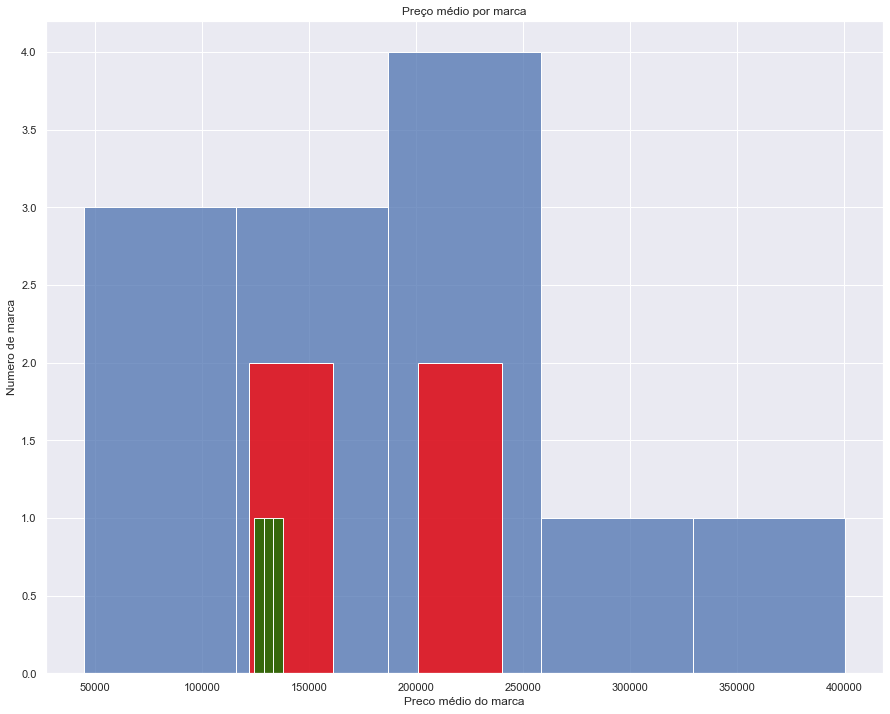

In [127]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_marcas_populares.loc[df_marcas_populares['estado_vendedor'] =='Sergipe (SE)'], x = 'preco')
graph = sns.histplot(data = df_marcas_populares.loc[df_marcas_populares['estado_vendedor'] =='Piauí (PI)'], x = 'preco',color='red')
graph = sns.histplot(data = df_marcas_populares.loc[df_marcas_populares['estado_vendedor'] =='Maranhão (MA)'], x = 'preco',color='green')
graph.set_title("Preço médio por marca")
graph.set_ylabel("Numero de marca")
graph.set_xlabel("Preco médio do marca")

In [128]:
df_marcas_populares.loc[df_marcas_populares['estado_vendedor'] =='Piauí (PI)']

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
7728,FIAT,TORO,2.0 16V TURBO DIESEL VOLCANO 4WD AT9,2020,2021,22291,Automática,2,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,216912
15621,CHEVROLET,JOY,1.0 SPE4 FLEX MANUAL,2020,2021,58364,Manual,4,Hatchback,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,121852
20315,FIAT,TORO,2.0 16V TURBO DIESEL FREEDOM 4WD AT9,2020,2021,50735,Automática,2,Picape,N,...,True,True,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,147847
23907,FIAT,TORO,2.0 16V TURBO DIESEL VOLCANO 4WD AT9,2020,2021,11349,Automática,2,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,240243


In [129]:
volume_marcas_populares_por_estado = df_marcas_populares['estado_vendedor'].value_counts()
volume_marcas_populares_por_estado = volume_marcas_populares_por_estado.reset_index()
volume_marcas_populares_por_estado.rename(columns={'index': 'Estados'}, inplace=True)
volume_marcas_populares_por_estado.rename(columns={'estado_vendedor': 'Numero de Carros'}, inplace=True)
volume_marcas_populares_por_estado['Estados'] = volume_marcas_populares_por_estado['Estados'].str.replace(r'\((.*?)\)','')
volume_marcas_populares_por_estado['Estados'] = volume_marcas_populares_por_estado['Estados'].str.strip()
volume_marcas_populares_por_estado

C:\Users\mptri\AppData\Local\Temp\ipykernel_7384\680572472.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  volume_marcas_populares_por_estado['Estados'] = volume_marcas_populares_por_estado['Estados'].str.replace(r'\((.*?)\)','')


,Estados,Numero de Carros
0,São Paulo,7670
1,Rio de Janeiro,1222
2,Paraná,1070
3,Santa Catarina,1041
4,Minas Gerais,795
5,Rio Grande do Sul,726
6,Goiás,362
7,Bahia,305
8,Pernambuco,149
9,Alagoas,83


In [130]:
path = 'data\populacao_estados_ibge2022.csv'
populacoes = pd.read_csv(path, header=None, names=['Estados','Populacao'])
populacoes['Estados'] = populacoes['Estados'].str.strip()
populacoes

,Estados,Populacao
0,São Paulo,44420459
1,Minas Gerais,20538718
2,Rio de Janeiro,16054524
3,Bahia,14136417
4,Paraná,11443208
5,Rio Grande do Sul,10880506
6,Pernambuco,9058155
7,Ceará,8791688
8,Pará,8116132
9,Santa Catarina,7609601


In [131]:
volume_marcas_populares_por_estado = volume_marcas_populares_por_estado.merge(populacoes, on='Estados')
volume_marcas_populares_por_estado

,Estados,Numero de Carros,Populacao
0,São Paulo,7670,44420459
1,Rio de Janeiro,1222,16054524
2,Paraná,1070,11443208
3,Santa Catarina,1041,7609601
4,Minas Gerais,795,20538718
5,Rio Grande do Sul,726,10880506
6,Goiás,362,7055228
7,Bahia,305,14136417
8,Pernambuco,149,9058155
9,Alagoas,83,3127511


In [132]:
volume_marcas_populares_por_estado['Carros Por Milhao de Populacao'] = (volume_marcas_populares_por_estado['Numero de Carros']*1000000/volume_marcas_populares_por_estado['Populacao']).round(3)

In [133]:
volume_marcas_populares_por_estado

,Estados,Numero de Carros,Populacao,Carros Por Milhao de Populacao
0,São Paulo,7670,44420459,173
1,Rio de Janeiro,1222,16054524,76
2,Paraná,1070,11443208,94
3,Santa Catarina,1041,7609601,137
4,Minas Gerais,795,20538718,39
5,Rio Grande do Sul,726,10880506,67
6,Goiás,362,7055228,51
7,Bahia,305,14136417,22
8,Pernambuco,149,9058155,16
9,Alagoas,83,3127511,27


Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?


In [134]:
tipo = df['tipo'].unique()
print(tipo)

['Sedã' 'Picape' 'Utilitário esportivo' 'Hatchback' 'Perua/SW' 'Cupê'
 'Minivan']


In [135]:
df_pickups = df.loc[df['tipo']=='Picape']
df_pickups['estado_vendedor'] = df_pickups['estado_vendedor'].str.replace(r'\((.*?)\)','')
df_pickups['estado_vendedor'] = df_pickups['estado_vendedor'].str.strip()
df_pickups_automaticas = df_pickups.loc[df_pickups['cambio']!='Manual']
df_pickups_automaticas

C:\Users\mptri\AppData\Local\Temp\ipykernel_7384\3295425736.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pickups['estado_vendedor'] = df_pickups['estado_vendedor'].str.replace(r'\((.*?)\)','')
C:\Users\mptri\AppData\Local\Temp\ipykernel_7384\3295425736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pickups['estado_vendedor'] = df_pickups['estado_vendedor'].str.replace(r'\((.*?)\)','')
C:\Users\mptri\AppData\Local\Temp\ipykernel_7384\3295425736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,...,True,True,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,123681
48,VOLKSWAGEN,GOLF,1.4 TSI HIGHLINE 16V GASOLINA 4P AUTOMÁTICO,2013,2015,61472,Automática,4,Picape,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,86305
61,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2017,2017,101623,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,89523
65,MINI,COOPER,1.6 S CABRIO 16V TURBO GASOLINA 2P AUTOMÁTICO,2013,2014,1336,Automática,2,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,217524
79,MERCEDES-BENZ,CLS 350,3.5 CGI V6 GASOLINA 4P AUTOMÁTICO,2013,2014,93979,Automática,4,Picape,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,364010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,VOLKSWAGEN,AMAROK,3.0 V6 TDI DIESEL HIGHLINE CD 4MOTION AUTOMÁTICO,2018,2019,22731,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,199812
29572,RAM,2500,6.7 LARAMIE 4X4 CD I6 TURBO DIESEL 4P AUTOMÁTICO,2016,2018,29548,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,257978
29579,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,403015
29580,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,Picape,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,88978


In [136]:
df_pickups_volume = df_pickups_automaticas['estado_vendedor'].value_counts()
df_pickups_volume = df_pickups_volume.reset_index()
df_pickups_volume.rename(columns={'estado_vendedor': 'Numero de Carros'}, inplace=True)
df_pickups_volume.rename(columns={'index': 'estado_vendedor'}, inplace=True)
df_pickups_volume['estado_vendedor'] = df_pickups_volume['estado_vendedor'].str.replace(r'\((.*?)\)','')
df_pickups_volume['estado_vendedor'] = df_pickups_volume['estado_vendedor'].str.strip()
df_pickups_volume

C:\Users\mptri\AppData\Local\Temp\ipykernel_7384\2440087239.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pickups_volume['estado_vendedor'] = df_pickups_volume['estado_vendedor'].str.replace(r'\((.*?)\)','')


,estado_vendedor,Numero de Carros
0,São Paulo,1746
1,Paraná,355
2,Rio de Janeiro,325
3,Santa Catarina,286
4,Minas Gerais,212
5,Rio Grande do Sul,201
6,Goiás,104
7,Bahia,70
8,Pernambuco,14
9,Alagoas,12


In [137]:
estados_maiores_volumes_pickups = df_pickups_volume.loc[df_pickups_volume['Numero de Carros'] > 200]
estados_maiores_volumes_pickups

,estado_vendedor,Numero de Carros
0,São Paulo,1746
1,Paraná,355
2,Rio de Janeiro,325
3,Santa Catarina,286
4,Minas Gerais,212
5,Rio Grande do Sul,201


In [138]:
lista_estados = estados_maiores_volumes_pickups["estado_vendedor"].values.tolist()
#lista_estados
df_pickups_filtrado = df_pickups.loc[df_pickups['estado_vendedor'].isin(lista_estados)]
df_pickups_filtrado

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,...,True,True,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,123681
45,VOLKSWAGEN,SAVEIRO,1.6 MSI ROBUST CD 8V FLEX 2P MANUAL,2019,2020,46596,Manual,4,Picape,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,50903
48,VOLKSWAGEN,GOLF,1.4 TSI HIGHLINE 16V GASOLINA 4P AUTOMÁTICO,2013,2015,61472,Automática,4,Picape,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,86305
49,RENAULT,KANGOO,1.6 EXPRESS 16V FLEX 3P MANUAL,2013,2015,76481,Manual,2,Picape,N,...,True,True,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,118708
54,FIAT,STRADA,1.3 FIREFLY FLEX FREEDOM CS MANUAL,2021,2021,15709,Manual,4,Picape,N,...,True,True,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,97194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29549,VOLKSWAGEN,SAVEIRO,1.6 CROSS CD 16V FLEX 2P MANUAL,2015,2017,99241,Manual,2,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,79963
29553,FORD,RANGER,3.2 LIMITED 4X4 CD 20V DIESEL 4P AUTOMÁTICO,2019,2020,16804,Automática,4,Picape,N,...,False,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,252231
29560,CHEVROLET,MONTANA,1.4 MPFI LS CS 8V FLEX 2P MANUAL,2016,2017,90929,Manual,4,Picape,N,...,False,False,NaN,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,62303
29561,VOLKSWAGEN,AMAROK,3.0 V6 TDI DIESEL HIGHLINE CD 4MOTION AUTOMÁTICO,2018,2019,22731,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,199812


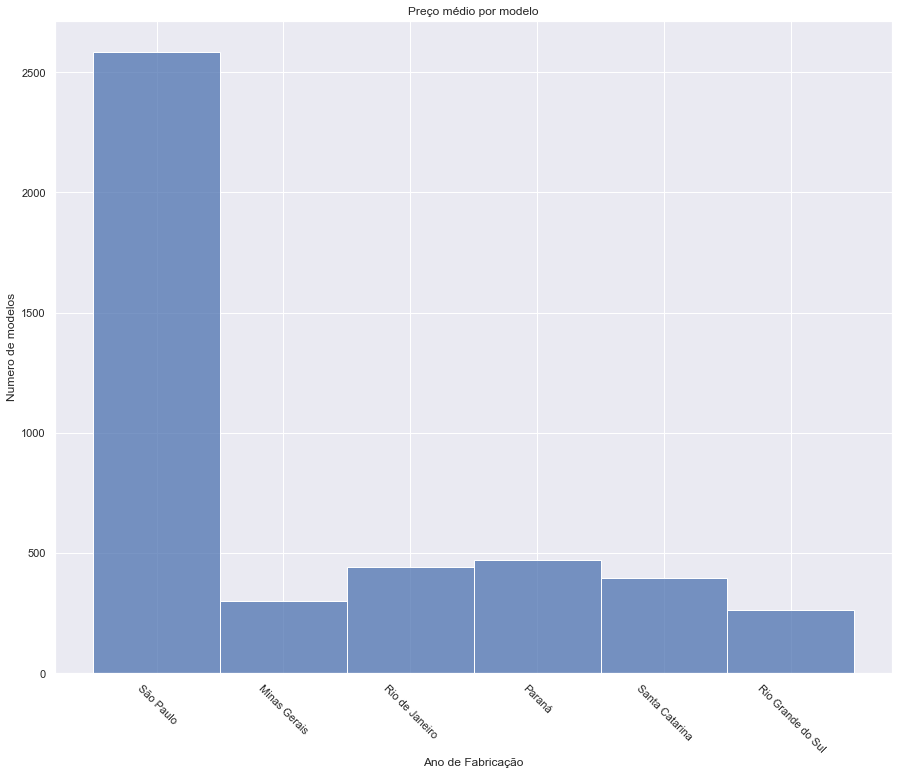

In [139]:

sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_pickups_filtrado, x ='estado_vendedor')
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")
graph.tick_params(axis='x', rotation=-45)
#formatter = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
#graph.xaxis.set_major_formatter(formatter)
#graph.set_xlim(0,500000)

In [140]:
df_pickups_por_estado = df_pickups_filtrado.groupby('estado_vendedor')['preco'].agg(['mean', 'std', 'min', 'max'])
df_pickups_por_estado = df_pickups_por_estado.reset_index()
df_pickups_por_estado.sort_values('mean')


,estado_vendedor,mean,std,min,max
3,Rio de Janeiro,154264,87253,16265,486870
5,São Paulo,156332,105206,13643,1154360
4,Santa Catarina,159073,111806,22727,1359813
0,Minas Gerais,163568,95840,17721,653173
1,Paraná,171580,94020,20759,550147
2,Rio Grande do Sul,171750,95629,27691,540420


In [141]:
df_pickups_automaticas_sp = df_pickups_automaticas.loc[df_pickups_automaticas['estado_vendedor'] == 'São Paulo']
df_pickups_automaticas_rj = df_pickups_automaticas.loc[df_pickups_automaticas['estado_vendedor'] == 'Rio de Janeiro']

df_pickups_automaticas_rj

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
79,MERCEDES-BENZ,CLS 350,3.5 CGI V6 GASOLINA 4P AUTOMÁTICO,2013,2014,93979,Automática,4,Picape,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,364010
85,FIAT,TORO,2.0 16V TURBO DIESEL VOLCANO 4WD AT9,2017,2017,114719,Automática,4,Picape,N,...,True,True,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,159924
236,FIAT,TORO,2.0 16V TURBO DIESEL VOLCANO 4WD AT9,2021,2021,9977,Automática,4,Picape,N,...,False,False,NaN,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,148122
259,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2016,2017,82577,Automática,4,Picape,N,...,True,True,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,200907
613,FORD,MUSTANG,5.0 V8 TI-VCT GASOLINA BLACK SHADOW SELECTSHIFT,2020,2020,8287,Automática,4,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,234678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29204,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2017,2017,85776,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,218820
29261,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2017,2018,98339,Automática,4,Picape,N,...,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,84304
29325,FORD,RANGER,3.2 LIMITED 4X4 CD 20V DIESEL 4P AUTOMÁTICO,2019,2020,38350,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,262079
29465,TOYOTA,HILUX,3.0 SRV 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P...,2010,2012,141326,Automática,4,Picape,N,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,126283


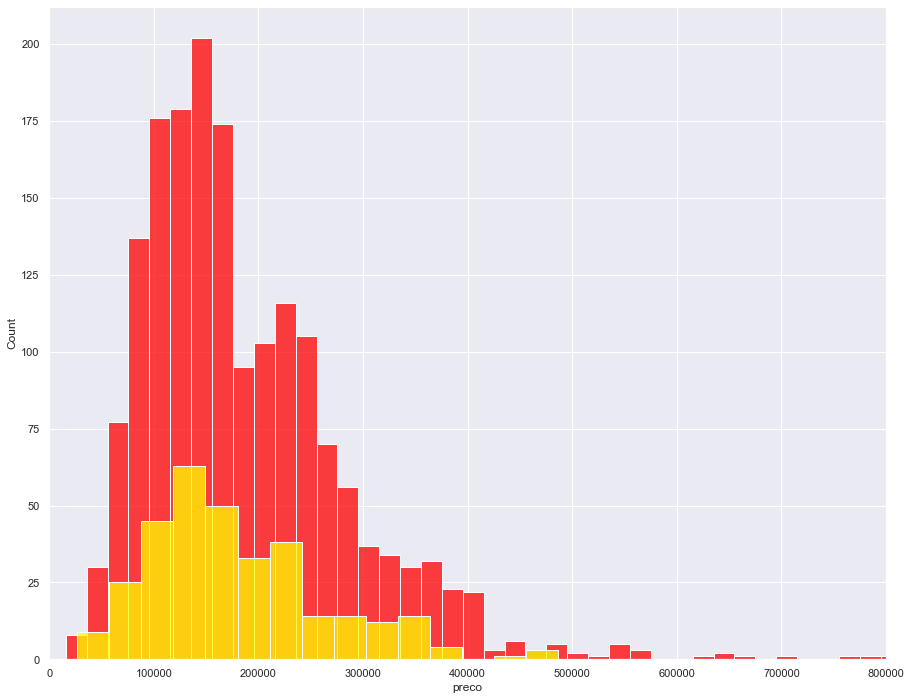

In [142]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_pickups_automaticas_sp, x = 'preco', color='red').set_xlim(0,800000)
graph2 = sns.histplot(data = df_pickups_automaticas_rj, x = 'preco', color='yellow').set_xlim(0,800000)
#graph.set_title("Preço médio por modelo")
#graph.set_ylabel("Numero de modelos")
#graph.set_xlabel("Ano de Fabricação")

#formatter = EngFormatter(places=0, sep="\N{THIN SPACE}") 
#graph.xaxis.set_major_formatter(formatter)
plt.show()

Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [143]:
garantia = df['garantia_de_fábrica'].unique()
garantia

array([nan, 'Garantia de fábrica'], dtype=object)

In [144]:
df_garantia = df.loc[df['garantia_de_fábrica'] == 'Garantia de fábrica']
df_garantia

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82420
8,VOLKSWAGEN,UP,1.0 TSI HIGH UP 12V FLEX 4P MANUAL,2017,2018,39987,Manual,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,75089
17,VOLKSWAGEN,POLO,1.0 200 TSI COMFORTLINE AUTOMÁTICO,2019,2019,35346,Automática,4,Hatchback,N,...,False,False,NaN,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,52376
19,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,2021,2022,7277,Manual,4,Utilitário esportivo,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,148360
21,PORSCHE,CAYENNE,3.0 V6 GASOLINA AWD TIPTRONIC S,2020,2020,8220,Automática,4,Utilitário esportivo,S,...,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,377513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29564,VOLKSWAGEN,GOL,1.6 16V MSI TOTALFLEX 4P AUTOMÁTICO,2021,2021,21166,Automática,4,Hatchback,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,199456
29566,FIAT,STRADA,1.3 FIREFLY FLEX FREEDOM CS MANUAL,2021,2022,2596,Manual,4,Hatchback,N,...,False,False,NaN,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,92239
29567,JEEP,RENEGADE,1.8 16V FLEX 4P AUTOMÁTICO,2019,2020,31095,Automática,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,55605
29579,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,Picape,N,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,403015


Como os carros perdem garantia caso não seja feita a revisão devidamente, vamos descartar os carros os quais não temos a confirmação de que todas revisões foram feitas pela concecionária

In [145]:
df_garantia_revisao = df_garantia.loc[df_garantia['revisoes_concessionaria'] == 'Todas as revisões feitas pela concessionária']
df_garantia_revisao

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82420
8,VOLKSWAGEN,UP,1.0 TSI HIGH UP 12V FLEX 4P MANUAL,2017,2018,39987,Manual,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,75089
19,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,2021,2022,7277,Manual,4,Utilitário esportivo,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,148360
21,PORSCHE,CAYENNE,3.0 V6 GASOLINA AWD TIPTRONIC S,2020,2020,8220,Automática,4,Utilitário esportivo,S,...,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,377513
23,CHEVROLET,EQUINOX,2.0 16V TURBO GASOLINA PREMIER AWD AUTOMÁTICO,2019,2019,22927,Automática,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,201114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29532,MERCEDES-BENZ,GLB 200,1.3 CGI GASOLINA PROGRESSIVE 7G-DCT,2021,2021,12074,Automática,4,Utilitário esportivo,N,...,False,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,380540
29551,JEEP,COMPASS,2.0 16V DIESEL S 4X4 AUTOMÁTICO,2020,2021,17657,Automática,4,Utilitário esportivo,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,186589
29564,VOLKSWAGEN,GOL,1.6 16V MSI TOTALFLEX 4P AUTOMÁTICO,2021,2021,21166,Automática,4,Hatchback,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,199456
29567,JEEP,RENEGADE,1.8 16V FLEX 4P AUTOMÁTICO,2019,2020,31095,Automática,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,55605


In [162]:
df_garantia_por_estado = df_garantia_revisao['estado_vendedor'].value_counts()
df_garantia_por_estado = df_garantia_por_estado.reset_index()
df_garantia_por_estado.rename(columns={'estado_vendedor': 'Numero de Carros'}, inplace=True)
df_garantia_por_estado.rename(columns={'index': 'estado_vendedor'}, inplace=True)
df_garantia_por_estado


,estado_vendedor,Numero de Carros
0,São Paulo (SP),1799
1,Rio de Janeiro (RJ),300
2,Paraná (PR),284
3,Santa Catarina (SC),272
4,Rio Grande do Sul (RS),231
5,Minas Gerais (MG),198
6,Goiás (GO),128
7,Alagoas (AL),45
8,Bahia (BA),39
9,Pernambuco (PE),19


In [163]:
estados_maiores_volumes_garantia = df_garantia_por_estado.loc[df_garantia_por_estado['Numero de Carros'] > 100]
estados_maiores_volumes_garantia['estado_vendedor'] = estados_maiores_volumes_garantia['estado_vendedor']
estados_maiores_volumes_garantia

C:\Users\mptri\AppData\Local\Temp\ipykernel_7384\628270173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados_maiores_volumes_garantia['estado_vendedor'] = estados_maiores_volumes_garantia['estado_vendedor']


,estado_vendedor,Numero de Carros
0,São Paulo (SP),1799
1,Rio de Janeiro (RJ),300
2,Paraná (PR),284
3,Santa Catarina (SC),272
4,Rio Grande do Sul (RS),231
5,Minas Gerais (MG),198
6,Goiás (GO),128


In [166]:
lista_estados = estados_maiores_volumes_garantia["estado_vendedor"].values.tolist()
lista_estados
df_garantia_filtrado = df_garantia_revisao.loc[df_garantia_revisao['estado_vendedor'].isin(lista_estados)]
df_garantia_filtrado

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,...,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82420
8,VOLKSWAGEN,UP,1.0 TSI HIGH UP 12V FLEX 4P MANUAL,2017,2018,39987,Manual,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,75089
19,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,2021,2022,7277,Manual,4,Utilitário esportivo,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,148360
21,PORSCHE,CAYENNE,3.0 V6 GASOLINA AWD TIPTRONIC S,2020,2020,8220,Automática,4,Utilitário esportivo,S,...,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,377513
23,CHEVROLET,EQUINOX,2.0 16V TURBO GASOLINA PREMIER AWD AUTOMÁTICO,2019,2019,22927,Automática,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,201114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29532,MERCEDES-BENZ,GLB 200,1.3 CGI GASOLINA PROGRESSIVE 7G-DCT,2021,2021,12074,Automática,4,Utilitário esportivo,N,...,False,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,380540
29551,JEEP,COMPASS,2.0 16V DIESEL S 4X4 AUTOMÁTICO,2020,2021,17657,Automática,4,Utilitário esportivo,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,186589
29564,VOLKSWAGEN,GOL,1.6 16V MSI TOTALFLEX 4P AUTOMÁTICO,2021,2021,21166,Automática,4,Hatchback,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,199456
29567,JEEP,RENEGADE,1.8 16V FLEX 4P AUTOMÁTICO,2019,2020,31095,Automática,4,Sedã,N,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,55605


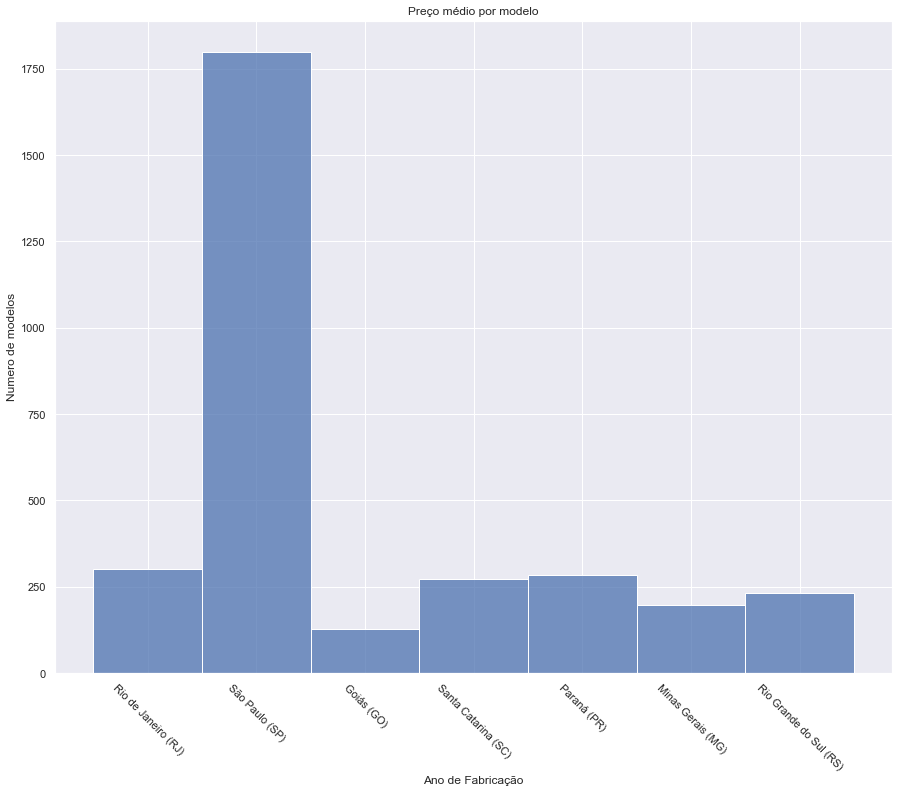

In [167]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_garantia_filtrado, x ='estado_vendedor')
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Ano de Fabricação")
graph.tick_params(axis='x', rotation=-45)
#formatter = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
#graph.xaxis.set_major_formatter(formatter)
#graph.set_xlim(0,500000)

In [168]:
df_garantia_filtrado_por_estado = df_garantia_filtrado.groupby('estado_vendedor')['preco'].agg(['mean', 'std', 'min', 'max'])
df_garantia_filtrado_por_estado = df_garantia_filtrado_por_estado.reset_index()
df_garantia_filtrado_por_estado.sort_values('mean')

,estado_vendedor,mean,std,min,max
1,Minas Gerais (MG),158502,74254,29907,426790
6,São Paulo (SP),168004,84211,31763,677129
0,Goiás (GO),168883,87035,45812,486648
2,Paraná (PR),171324,78341,29328,411923
5,Santa Catarina (SC),174984,96625,44005,672933
3,Rio Grande do Sul (RS),178862,90161,54743,589419
4,Rio de Janeiro (RJ),180841,84383,39556,486870
